In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("drive/MyDrive/data for colab/customer_dataset.csv")
data = pd.read_csv("drive/MyDrive/data for colab/customer_dataset.csv")

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [ ]:
df.shape

(8068, 10)

In [ ]:
df.drop(columns=["ID"], inplace=True)

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [ ]:
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [ ]:
df_numb = df.select_dtypes(include=["int64", "float64"])
df_obj = df.select_dtypes(include=["object"])

In [ ]:
df_numb.isna().mean() * 100

Age                 0.000000
Work_Experience    10.275161
Family_Size         4.152206
dtype: float64

In [ ]:
df_obj["Work_Inexperienced"] = df_numb["Work_Experience"].isna().astype(int)
df_obj.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Work_Inexperienced
0,Male,No,No,Healthcare,Low,Cat_4,0
1,Female,Yes,Yes,Engineer,Average,Cat_4,1
2,Female,Yes,Yes,Engineer,Low,Cat_6,0
3,Male,Yes,Yes,Lawyer,High,Cat_6,0
4,Female,Yes,Yes,Entertainment,High,Cat_6,1


In [ ]:
df_numb["Family_Size"].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [ ]:
df_obj["Unknown_Family_Status"] = df_numb["Family_Size"].isna().astype(int)
df_obj.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Work_Inexperienced,Unknown_Family_Status
0,Male,No,No,Healthcare,Low,Cat_4,0,0
1,Female,Yes,Yes,Engineer,Average,Cat_4,1,0
2,Female,Yes,Yes,Engineer,Low,Cat_6,0,0
3,Male,Yes,Yes,Lawyer,High,Cat_6,0,0
4,Female,Yes,Yes,Entertainment,High,Cat_6,1,0


In [ ]:
df_numb.fillna(value={"Work_Experience": 0.0, "Family_Size": 0.0}, inplace=True)
df_numb.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,0.0,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,0.0,6.0


In [ ]:
df_obj.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Work_Inexperienced,Unknown_Family_Status
0,Male,No,No,Healthcare,Low,Cat_4,0,0
1,Female,Yes,Yes,Engineer,Average,Cat_4,1,0
2,Female,Yes,Yes,Engineer,Low,Cat_6,0,0
3,Male,Yes,Yes,Lawyer,High,Cat_6,0,0
4,Female,Yes,Yes,Entertainment,High,Cat_6,1,0


In [ ]:
df_obj.isna().mean()[df_obj.isna().sum() > 0] * 100

Ever_Married    1.735250
Graduated       0.966782
Profession      1.536936
Var_1           0.941993
dtype: float64

In [ ]:
df_obj.fillna(value={
    "Ever_Married": "Unknown",
    "Graduated": "Unknown",
    "Profession": "Unknown"
}, inplace=True)
df_obj.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Work_Inexperienced,Unknown_Family_Status
0,Male,No,No,Healthcare,Low,Cat_4,0,0
1,Female,Yes,Yes,Engineer,Average,Cat_4,1,0
2,Female,Yes,Yes,Engineer,Low,Cat_6,0,0
3,Male,Yes,Yes,Lawyer,High,Cat_6,0,0
4,Female,Yes,Yes,Entertainment,High,Cat_6,1,0


In [ ]:
df_obj["Var_1"].value_counts(dropna=False)

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
NaN        76
Name: Var_1, dtype: int64

In [ ]:
df_obj.fillna(value={"Var_1": "Cat_0"}, inplace=True)
df_obj.head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Work_Inexperienced,Unknown_Family_Status
0,Male,No,No,Healthcare,Low,Cat_4,0,0
1,Female,Yes,Yes,Engineer,Average,Cat_4,1,0
2,Female,Yes,Yes,Engineer,Low,Cat_6,0,0
3,Male,Yes,Yes,Lawyer,High,Cat_6,0,0
4,Female,Yes,Yes,Entertainment,High,Cat_6,1,0


In [ ]:
df = pd.concat([df_numb, df_obj], axis=1)
df.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Work_Inexperienced,Unknown_Family_Status
0,22,1.0,4.0,Male,No,No,Healthcare,Low,Cat_4,0,0
1,38,0.0,3.0,Female,Yes,Yes,Engineer,Average,Cat_4,1,0
2,67,1.0,1.0,Female,Yes,Yes,Engineer,Low,Cat_6,0,0
3,67,0.0,2.0,Male,Yes,Yes,Lawyer,High,Cat_6,0,0
4,40,0.0,6.0,Female,Yes,Yes,Entertainment,High,Cat_6,1,0


In [ ]:
df.isna().sum().any()

False

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Work_Experience,Family_Size,Work_Inexperienced,Unknown_Family_Status,Gender_Male,Ever_Married_Unknown,Ever_Married_Yes,Graduated_Unknown,Graduated_Yes,...,Profession_Unknown,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,38,0.0,3.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,67,0.0,2.0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,40,0.0,6.0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(8068, 28)

In [ ]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

# KMeans

k = 2: Silhouette_score: 0.10194075658149736
k = 3: Silhouette_score: 0.1124767911590874
k = 4: Silhouette_score: 0.11924873012296106
k = 5: Silhouette_score: 0.128191649029629
k = 6: Silhouette_score: 0.13699300252808363
k = 7: Silhouette_score: 0.14202321370485646
k = 8: Silhouette_score: 0.1531428182314019
k = 9: Silhouette_score: 0.16075608986715031
k = 10: Silhouette_score: 0.16761253611803956
k = 11: Silhouette_score: 0.17170090425101947
k = 12: Silhouette_score: 0.20044223186683371
k = 13: Silhouette_score: 0.18879678582901036
k = 14: Silhouette_score: 0.1902030832585692
k = 15: Silhouette_score: 0.1979279502910795
k = 16: Silhouette_score: 0.1972232999731758
k = 17: Silhouette_score: 0.19055537156876057
k = 18: Silhouette_score: 0.1975106621307369
k = 19: Silhouette_score: 0.1723408404267378
k = 20: Silhouette_score: 0.1892676119205646
k = 21: Silhouette_score: 0.20510832404085916
k = 22: Silhouette_score: 0.21190019306269262
k = 23: Silhouette_score: 0.22051712316525968
k = 24

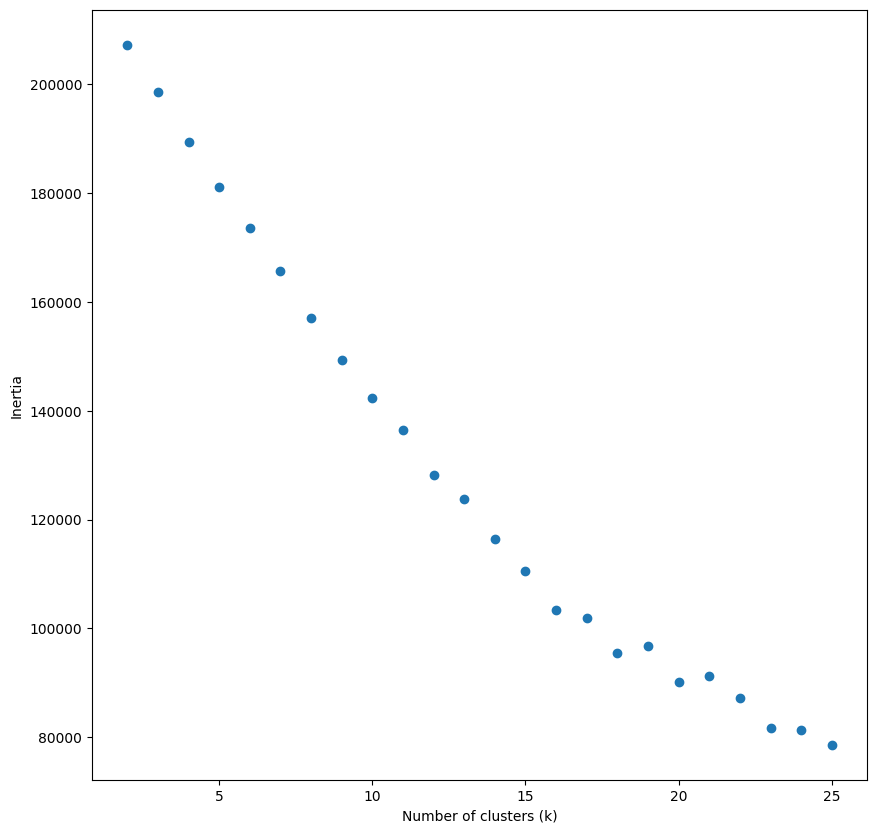

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
for k in range(2, 26):
  model = KMeans(k, n_init="auto", random_state=42)
  labels = model.fit_predict(df)
  inertia.append(model.inertia_)

  silhouette_avg = silhouette_score(df, labels)
  print(f"k = {k}: Silhouette_score: {silhouette_avg}")

plt.figure(figsize=(10, 10))
plt.ylabel("Inertia")
plt.xlabel("Number of clusters (k)")
plt.scatter(range(2, 26), inertia)

In [ ]:
k = 4
model = KMeans(k, n_init="auto", random_state=42)
model.fit(df)
labels = model.predict(df)

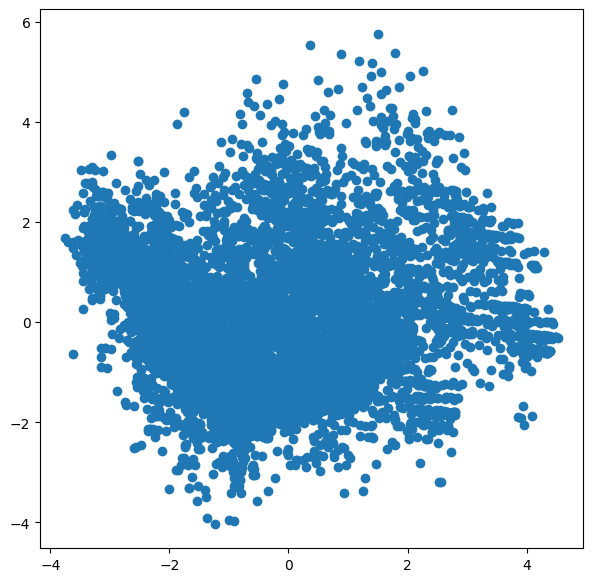

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

plt.figure(figsize=(7, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

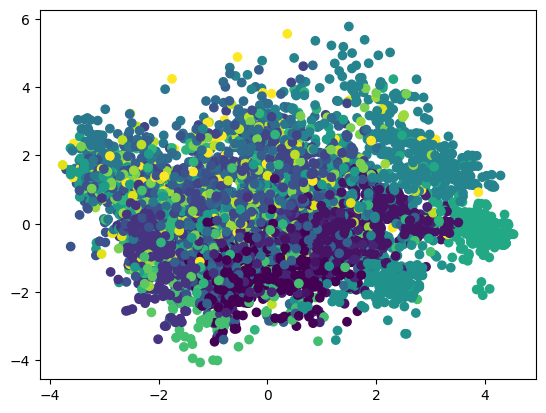

In [ ]:
order = np.argsort(np.linalg.norm(model.cluster_centers_, axis=1))
new_clusters = np.zeros_like(labels)
for i in range(k):
    new_clusters[labels == order[i]] = i
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=new_clusters)
plt.show()

In [ ]:
ans = pd.DataFrame({"ID": data["ID"], "Segmentation": labels})
ans.replace(pd.unique(labels), np.arange(1, k + 1), inplace=True)
# ans.to_csv("ans2.csv", index=False)
ans.head()

,ID,Segmentation
0,462809,1
1,462643,2
2,466315,2
3,461735,3
4,462669,3


Kaggle score: 0.38572

# Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

k = 4
model = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward")
labels = model.fit_predict(df)

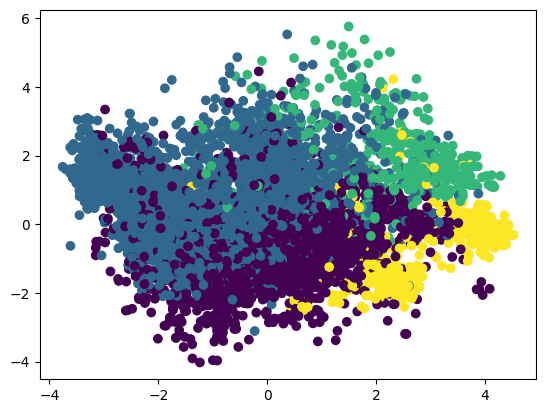

In [ ]:
clusters = model.labels_
cluster_centers = np.zeros((k, df.shape[1]))
for i in range(k):
    cluster_centers[i] = np.mean(df[clusters == i], axis=0)

order = np.argsort(np.linalg.norm(cluster_centers, axis=1))
new_clusters = np.zeros_like(clusters)
for i in range(k):
    new_clusters[clusters == order[i]] = i

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=new_clusters)
plt.show()

In [ ]:
ans = pd.DataFrame({"ID": data["ID"], "Segmentation": labels})
ans.replace(pd.unique(labels), np.arange(1, k + 1), inplace=True)
# ans.to_csv("ans5.csv", index=False)
ans.head()

,ID,Segmentation
0,462809,1
1,462643,1
2,466315,1
3,461735,2
4,462669,3


Kaggle score: 0.34407

Text(0, 0.5, 'Euclidean distances')

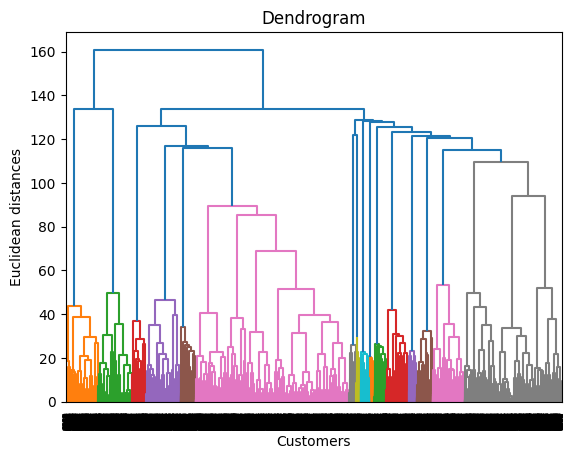

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df, method="ward")) 
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10).fit(df)
labels = model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of clusters: 44
Estimated number of noise points: 7217


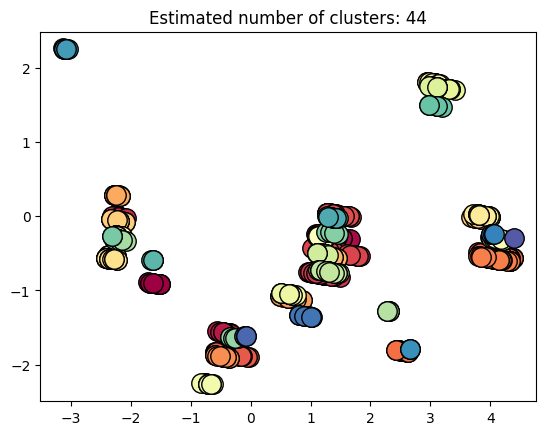

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [ ]:
ans = pd.DataFrame({"ID": data["ID"], "Segmentation": labels})
ans.replace(pd.unique(labels), np.arange(1, n_clusters_ + 2), inplace=True)
# ans.to_csv("ans6.csv", index=False)
ans.head()

,ID,Segmentation
0,462809,1
1,462643,1
2,466315,1
3,461735,2
4,462669,1


Kaggle score: 0.24194